<a href="https://colab.research.google.com/github/sbuttler/CTGAN/blob/master/Building_style_classifier_lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
path = Path('/content/drive/My Drive/Building_style_classifier')

In [0]:
folder = 'Gothic'
file = 'URLs_Gothic'

In [0]:
folder = 'Renaissance'
file = 'URLs_Renaissance'

In [0]:
folder = 'Bauhaus'
file = 'URLs_Bauhaus'

In [0]:
folder = 'Baroque'
file = 'URLs_Baroque'

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [24]:
path.ls()

[PosixPath('/content/drive/My Drive/Building_style_classifier/URLs_Gothic'),
 PosixPath('/content/drive/My Drive/Building_style_classifier/URLs_Renaissance'),
 PosixPath('/content/drive/My Drive/Building_style_classifier/URLs_Bauhaus'),
 PosixPath('/content/drive/My Drive/Building_style_classifier/URLs_Baroque'),
 PosixPath('/content/drive/My Drive/Building_style_classifier/Gothic'),
 PosixPath('/content/drive/My Drive/Building_style_classifier/Renaissance'),
 PosixPath('/content/drive/My Drive/Building_style_classifier/Bauhaus'),
 PosixPath('/content/drive/My Drive/Building_style_classifier/Baroque')]

In [0]:
#download images URLs by pasting this code to javascript console
'''urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));'''

Download images from URLs

In [0]:
classes = ['Gothic', 'Renaissance', 'Bauhaus', 'Baroque']

In [41]:
download_images(path/file, dest, max_pics=200)

In [42]:
# remove images that cannot be opened
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Gothic


Renaissance


Bauhaus


Baroque


In [0]:
#inspect data
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [59]:
data.classes

['Baroque', 'Bauhaus', 'Gothic', 'Renaissance']

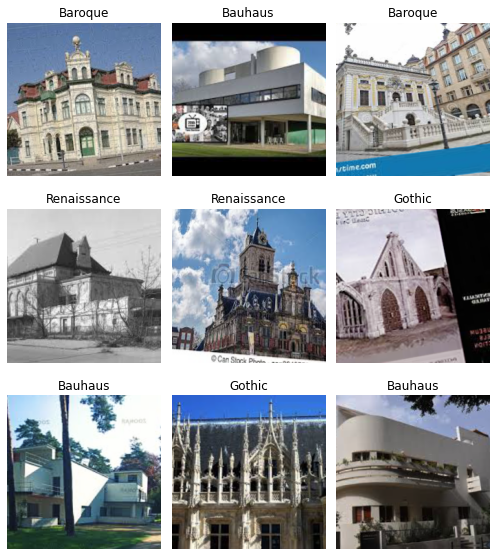

In [60]:
data.show_batch(rows=3, figsize=(7,8))

In [61]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Baroque', 'Bauhaus', 'Gothic', 'Renaissance'], 4, 541, 135)

Build model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [63]:
learn.fit_one_cycle(4)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [66]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


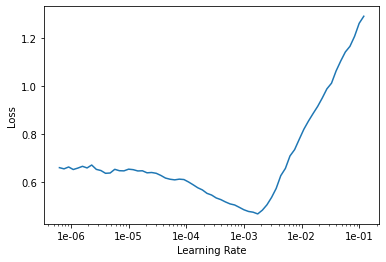

In [67]:
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(2, max_lr=slice(2e-5,2e-4))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [69]:
learn.fit_one_cycle(4, max_lr=slice(2e-5,2e-4))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [0]:
learn.save('stage-2')

Interpretation of results

In [0]:
learn.load('stage-2');

In [72]:
interp = ClassificationInterpretation.from_learner(learn)

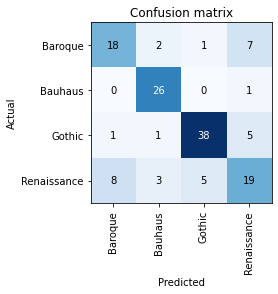

In [73]:
interp.plot_confusion_matrix()

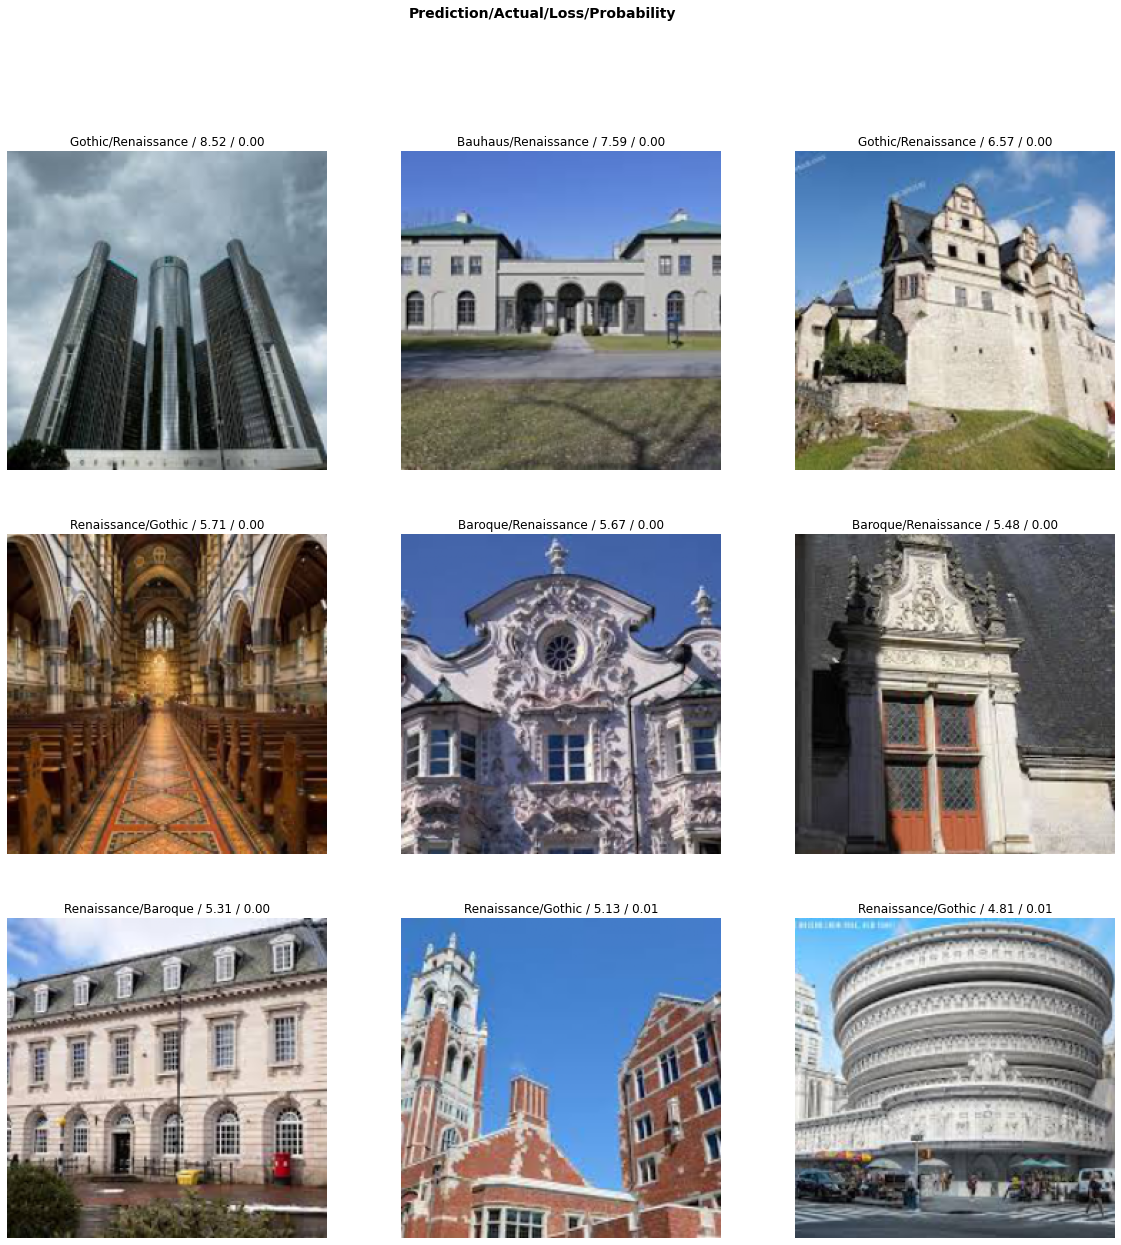

In [79]:
interp.plot_top_losses(9, figsize=(20,20))

LabelList (541 items)
x: ImageList
Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300)
y: CategoryList
Gothic,Gothic,Gothic,Gothic,Gothic
Path: /content/drive/My Drive/Building_style_classifier

In production

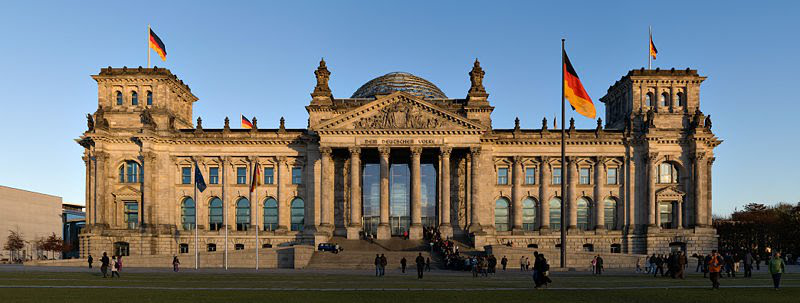

In [80]:
# load new image to classify
img = open_image(path/'img1.jpg')
img

In [81]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)

In [83]:
data.classes

['Baroque', 'Bauhaus', 'Gothic', 'Renaissance']

In [84]:
pred_idx

tensor(0)

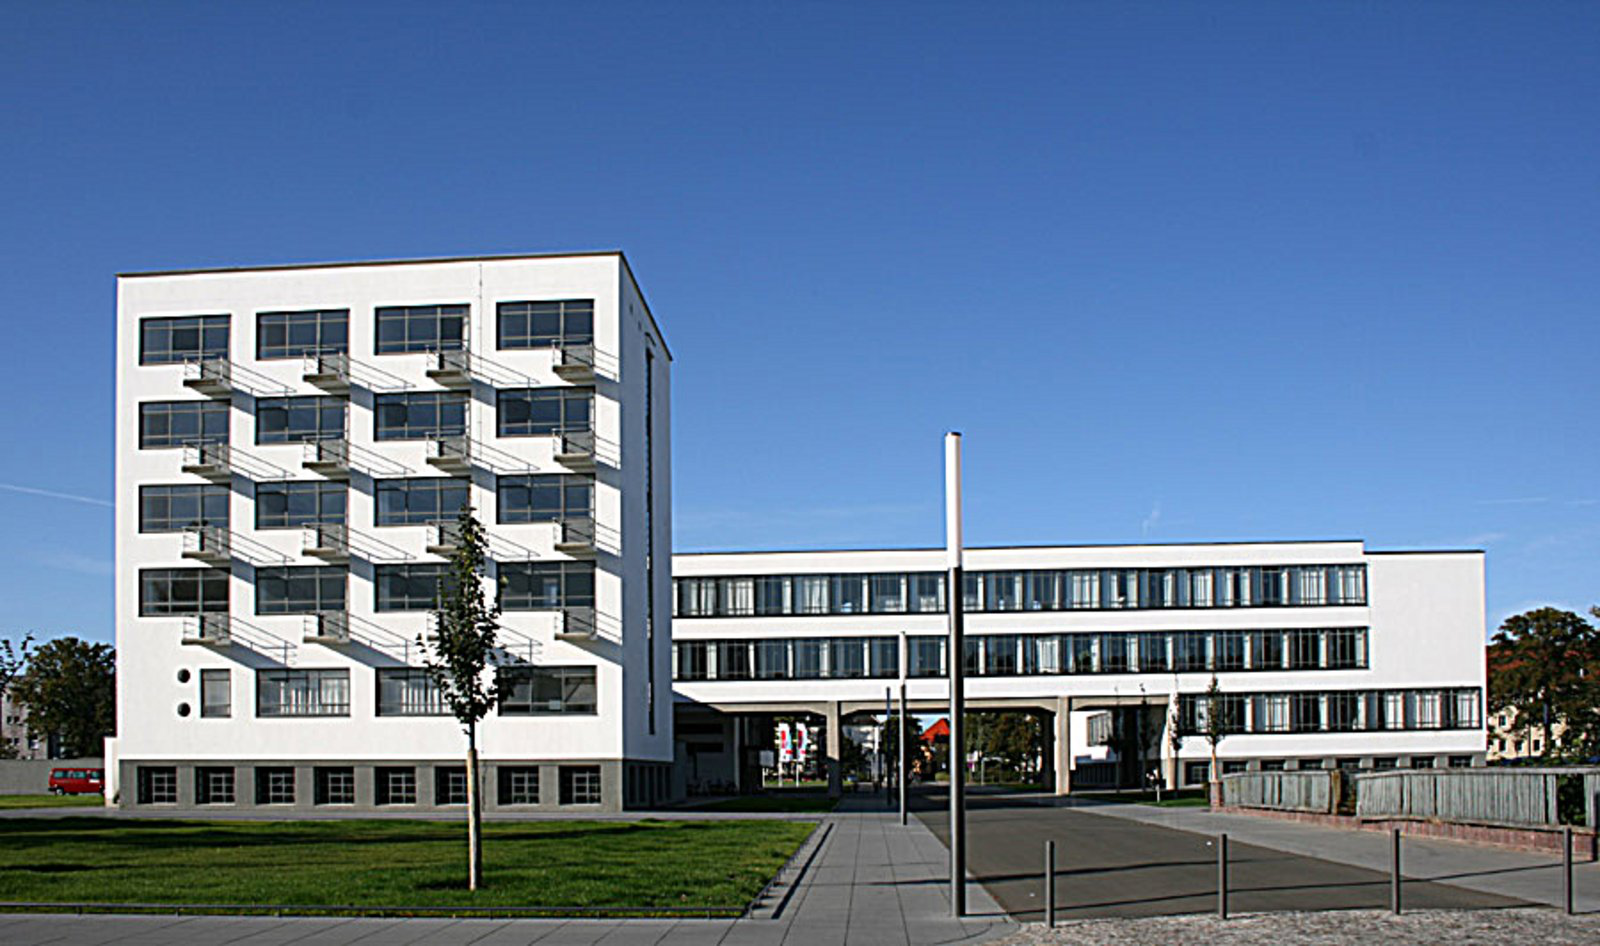

In [85]:
img2 = open_image(path/'img2.jpg')
img2

In [87]:
pred_class2, pred_idx2, outputs2 = learn.predict(img2)
pred_class2

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Category tensor(1)